# Introduction to Pyomo

## Example 1: Solving Quadratic Programming Problems
$$ \min\limits_{x} \cfrac{1}{2} \pmb{x^T H x + \alpha^Tx, H} \in R^{n \times n}\  \text{and}\ x \in R^{n} \\
\min\limits_{x} =x^2_1 + 4x^2_2 + 4x^2_3 + x^2_4 + 4x_1x_3 + 4x_2x_4 + 2x_1 + x_2 + x_3 + 2x_4\\
st: x_1 + x_4 \geq 10 \\
2x_1 + x_2 + x_3 + 2x_4 \geq 24 \\
x_2 + x_3 \geq 20 \\
x_1 + x_2 + x_3 + x_4 \leq 30 \\
0 \leq x_1,x_2,x_4,x_4 \leq 20
$$

In [1]:
import pyomo.environ as pym
from pyomo.opt import SolverFactory

# define model
m = pym.ConcreteModel()

# define variables
m.x1, m.x2, m.x3, m.x4 = pym.Var(bounds=(0., 20)), pym.Var(bounds=(0., 20)), pym.Var(bounds=(0., 20)), pym.Var(bounds=(0., 20))

# define objective function
m.objfun = pym.Objective(expr=m.x1**2 + 4*m.x2**2+ 4*m.x3**2 + m.x4**2 + 4*m.x1*m.x3 + 4*m.x2*m.x4 + 2*m.x1 + m.x2 + m.x3 + 2*m.x4)

# define constraints
m.con1 = pym.Constraint(expr=m.x1+ m.x4 >= 10)
m.con2 = pym.Constraint(expr=2*m.x1 + m.x2 + m.x3 + 2*m.x4 >= 24)
m.con3 = pym.Constraint(expr=m.x2 + m.x3 >= 20)
m.con4 = pym.Constraint(expr=m.x1 + m.x2 + m.x3 + m.x4 >= 30)

# solve problem
opt = SolverFactory('ipopt')
OptResults = opt.solve(m)

# print results
print('nnStatus of optimization process: ', OptResults.solver.Status, '\n')
print('Status of termination condition: ', OptResults.solver.termination_condition, '\n')
print('Optimal solution obtained at: \n x\t', '{0:8.6f}'.format(m.x1.value), '\n y \t', '{0:8.6f}'.format(m.x2.value), '\n z\t', '{0:8.6f}'.format(m.x3.value), \
      '\n z\t', '{0:8.6f}'.format(m.x4.value), '\n')
print('Value of the objective function at optimal solution: ', '{0:8.6f}'.format(m.objfun()))

nnStatus of optimization process:  ok 

Status of termination condition:  optimal 

Optimal solution obtained at: 
 x	 5.000000 
 y 	 10.000000 
 z	 10.000000 
 z	 5.000000 

Value of the objective function at optimal solution:  1289.999975


## Example 2: unconstrained optimization
$$ \min\limits_{x \in R^3} = 100(x_2 - x_1^2)^2 + (1-x_1)^2 $$

In [2]:
import pyomo.environ as pym
from pyomo.opt import SolverFactory

m = pym.ConcreteModel()

m.x1, m.x2 = pym.Var(), pym.Var()

m.objfun = pym.Objective(expr=100*(m.x2 - m.x1**2)**2 + (1-m.x1)**2)

# solve problem
opt = SolverFactory('ipopt')
OptResults = opt.solve(m)

# print results
print('nnStatus of optimization process: ', OptResults.solver.Status, '\n')
print('Status of termination condition: ', OptResults.solver.termination_condition, '\n')
print('Optimal solution obtained at: \n x\t', '{0:8.6f}'.format(m.x1.value), '\n y \t', '{0:8.6f}'.format(m.x2.value), '\n')
print('Value of the objective function at optimal solution: ', '{0:8.6f}'.format(m.objfun()))

nnStatus of optimization process:  ok 

Status of termination condition:  optimal 

Optimal solution obtained at: 
 x	 1.000000 
 y 	 1.000000 

Value of the objective function at optimal solution:  0.000000


# Example 3: The Rosenbrock Problem
$$ \min\limits_{x,y} f(x,y) = (1-x)^2 + 100(y-x^2)^2 $$

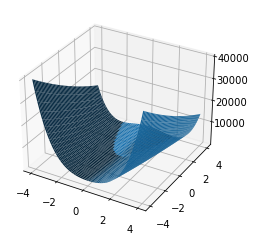

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

def Rosenbrock(x,y):
    return (1 + x)**2 + 100*(y - x**2)**2

x = np.linspace(-4,4,250)
y = np.linspace(-4,4,250)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z)

plt.show()

In [6]:
import pyomo.environ as pym
from pyomo.opt import SolverFactory

model = pym.ConcreteModel()
model.x = pym.Var(initialize=1.5)
model.y = pym.Var(initialize=1.5)

def Rosenbrock():
    return (1 + model.x)**2 + 100*(model.y - model.x**2)**2

model.obj = pym.Objective(expr=Rosenbrock() )

model.display()

# solve problem
opt = SolverFactory('ipopt')
OptResults = opt.solve(model)

# print results
print('nnStatus of optimization process: ', OptResults.solver.Status, '\n')
print('Status of termination condition: ', OptResults.solver.termination_condition, '\n')
print('Optimal solution obtained at: \n x\t', '{0:8.6f}'.format(model.x.value), '\n y \t', '{0:8.6f}'.format(model.x.value), '\n')
print('Value of the objective function at optimal solution: ', '{0:8.6f}'.format(m.objfun()))

Model unknown

  Variables:
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   1.5 :  None : False : False :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   1.5 :  None : False : False :  Reals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :  62.5

  Constraints:
    None
nnStatus of optimization process:  ok 

Status of termination condition:  optimal 

Optimal solution obtained at: 
 x	 -1.000000 
 y 	 -1.000000 

Value of the objective function at optimal solution:  0.000000
